In [1]:
from utils.datareader import DBpediaReader
from utils.datareader import CIFAR100Reader
from deepmf.deepmf import deepmf
from hiernmf2.hier_nmf import hier8_neat

In [2]:
image_reader = CIFAR100Reader()
image_reader.get_data_matrix()

In [11]:
X=image_reader.X_sm.T*255

In [12]:
X = X.reshape(1000,3,32,32)

In [14]:
X = X.transpose(0,2,3,1)

In [15]:
image=X[3]

In [19]:
int(image)

TypeError: only size-1 arrays can be converted to Python scalars

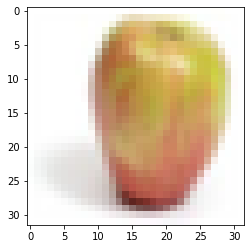

In [21]:
pyplot.imshow(image.astype(np.uint8))

In [20]:
import numpy as np
(image_reader.X_lg*255).astype(np.uint8)

array([[215,  38, 255, ...,   5,  28, 134],
       [162,  92, 255, ...,   4,  49, 132],
       [149, 192, 255, ...,   3,  45, 132],
       ...,
       [ 56,  50, 255, ...,   0,   1,  21],
       [ 55,  52, 255, ...,   0,   2,  21],
       [ 55,  50, 255, ...,   0,   2,  21]], dtype=uint8)

In [8]:
from matplotlib import pyplot

TypeError: Invalid shape (3072,) for image data

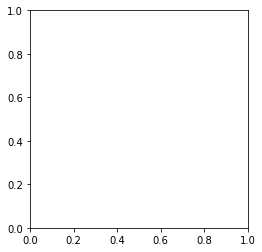

In [10]:
pyplot.imshow(image_reader.X_lg[:,0].T*255)
pyplot.show()